## LAB 1

벡터 데이터를 만들어 alpha값은 0.2로, initial 값은 simple로 인수를 설정하여 단순지수평활법에 해당하는 forecast 패키지의 ses()함수를 실행해봅니다.<br/>

이 때 initial 값을 simple로 설정하게되면 초기값을 그대로 사용한다는 의미이며, 설정한 alpha값은 초기 0.2부터 지수적으로 상쇄하게되어 과거의 데이터에는 아주 미미한 영향만을 받게됩니다.<br/>

Error measures 부분도 한번 확인해보세요!<br/>

In [1]:
library(forecast)

simple_ex.ts <- ts(c(35,25,30,35,32))
simple_ex.ts

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



A Time Series:
[1] 35 25 30 35 32

In [2]:
simple_ex_fit <- ses(simple_ex.ts, alpha = 0.2, initial = "simple")
simple_ex_fit$fitted  # 적합된 데이터 값

A Time Series:
[1] 35.00 35.00 33.00 32.40 32.92

In [3]:
summary(simple_ex_fit)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = simple_ex.ts, initial = "simple", alpha = 0.2) 

  Smoothing parameters:
    alpha = 0.2 

  Initial states:
    l = 35 

  sigma:  4.8292
Error measures:
                 ME     RMSE   MAE       MPE     MAPE      MASE       ACF1
Training set -2.264 4.829211 3.304 -9.089286 12.06071 0.5746087 -0.0974225

Forecasts:
   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
 6         32.736 26.54712 38.92488 23.27092 42.20108
 7         32.736 26.42455 39.04745 23.08347 42.38853
 8         32.736 26.30432 39.16768 22.89960 42.57240
 9         32.736 26.18630 39.28570 22.71910 42.75290
10         32.736 26.07037 39.40163 22.54180 42.93020
11         32.736 25.95642 39.51558 22.36752 43.10448
12         32.736 25.84435 39.62765 22.19613 43.27587
13         32.736 25.73408 39.73792 22.02748 43.44452
14         32.736 25.62551 39.84649 21.86145 43.61055
15         32.736 25.51858 39.

## LAB 2

데이터를 불러들여 이번엔 optimal로 계산을 한번 해봅시다.<br/>
초기값을 optimal로 하게되면 초기값하고 알파값도 optimal(최적)한 값으로 찾아서 알아서 해줍니다.<br/>

파라미터로 h=3 으로 주게되면 미래값을 3개 예측해서 보여달라는 뜻이 됩니다.<br/>

In [4]:
ses_pra <- read.csv("ses_pra.csv")
ses_pra.ts <- ts(ses_pra$sales, start=1987)
ses_pra.ts
ses_pra_fit <- ses(ses_pra.ts, initial="optimal", h=3)

A Time Series:
 [1] 312 381 317 337 399 387 375 349 386 358 389 343 328 388 412 334 422 348 399
[20] 398 434 362 454 365

In [5]:
summary(ses_pra_fit)
ses_pra_fit$fitted


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = ses_pra.ts, h = 3, initial = "optimal") 

  Smoothing parameters:
    alpha = 0.1381 

  Initial states:
    l = 359.4534 

  sigma:  37.858

     AIC     AICc      BIC 
254.6095 255.8095 258.1436 

Error measures:
                   ME    RMSE    MAE      MPE     MAPE      MASE       ACF1
Training set 8.559516 36.2463 32.684 1.434134 8.642223 0.6915658 -0.4001672

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2011       387.8327 339.3157 436.3497 313.6323 462.0331
2012       387.8327 338.8549 436.8105 312.9277 462.7378
2013       387.8327 338.3984 437.2670 312.2295 463.4359


A Time Series:
 [1] 359.4534 352.8978 356.7801 351.2846 349.3112 356.1756 360.4339 362.4461
 [9] 360.5886 364.0991 363.2565 366.8129 363.5232 358.6158 362.6751 369.4892
[17] 364.5865 372.5180 369.1309 373.2572 376.6754 384.5946 381.4732 391.4926

차트를 한번 그려보도록 합시다.<br/>

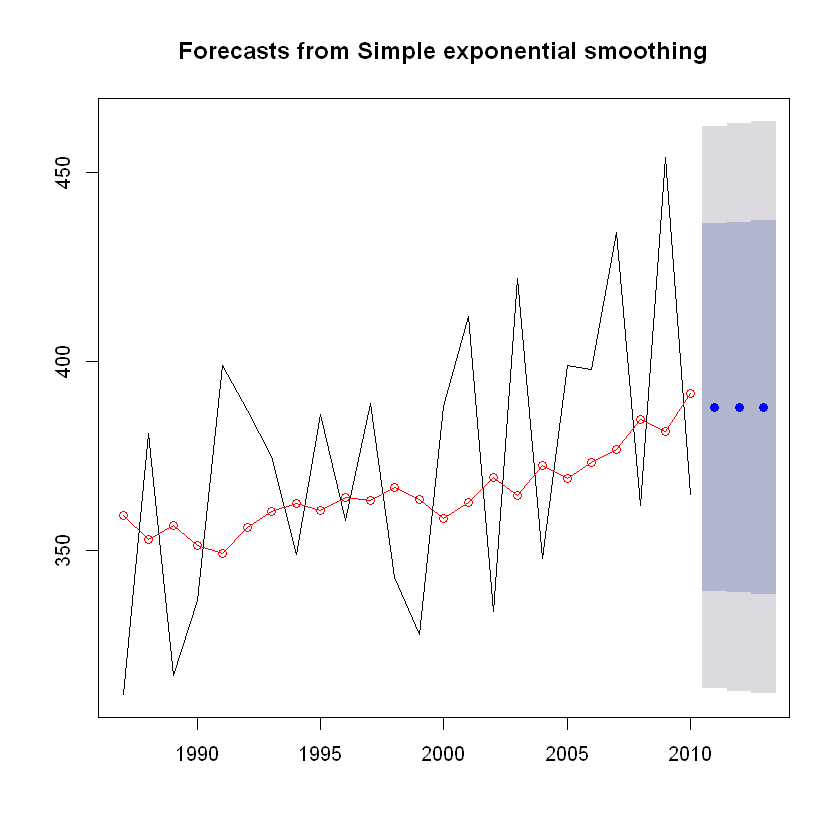

In [6]:
plot(ses_pra_fit)
lines(fitted(ses_pra_fit), type="o", col="red")

시계열자료가 갖는 변수는 들쑥날쑥하기도하며 변화하는 정도가 심한 경우가 보통입니다. 순환변동과 계절변동은 물론 불규칙변동까지 작용하기 때문이지요. 그래서 이러한 시계열 데이터를 정확하게 파악 및 예측하기란 쉽지 않은 일입니다. 변화 폭이 심한 시계열자료를 평탄하고 변화가 완만한 값으로 변환시키는 것으로부터 문제해결에 접근하는 예측방법을 평활 (smoothing) 이라고 부릅니다. 즉 평활이란 들쭉날쭉한 시계열자료 값을 평탄한 값으로 변환하는 것입니다.

그 중에서도 단순지수평활법은 가중치의 개념을 이용하여 아주 잔잔하거나 추세나 계절성이 없는 데이터들에 적용하기에 적절한 분석법으로 도식화해서 확인해보니 잘 이해가 되시죠?

그리고 참고로 오른쪽 띠에서 진한부분은 신뢰구간을 의미하며 (위 아래는 약간 희끄무리하잖아요? 저 부분은 기각역이라고 볼 수 있습니다.)